In [1]:
import warnings as En_Offen_span__w
En_Offen_span__w.filterwarnings("ignore")
import pandas as En_Offen_span__N

In [2]:
####### Spanish offensive language
En_Offen_span_1 = En_Offen_span__N.read_csv('Spanish_final.csv')
En_Offen_span_1

,tweet a etiquetar,hate speech/estereotipo
0,tan tan feminista invisibilizaban constantemen...,0.0
1,eneatipo cooperativa karina ol carga q convirt...,0.0
2,sabr n femiorca karina ol flaiterio mapuchento...,1.0
3,antodellaw jonaoval carolinaleitao penalolen v...,0.0
4,ciudadanolevi debajo piedra flaiterio,0.0
...,...,...
9522,tere marinov toda raz n sra marinov hoy femini...,1.0
9523,anariagrando andreaenlaruta clintjoselint ver ...,0.0
9524,feminista tan agresor dan risa verdad asco con...,0.0
9525,machinet feminista dicen colega karina oliva,0.0


In [3]:
En_Offen_span_1['hate speech/estereotipo'].value_counts()

0.0    8919
1.0     608
Name: hate speech/estereotipo, dtype: int64

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer as En_Offen_span_1tf

En_Offen_span_1zer = En_Offen_span_1tf(analyzer='word', ngram_range= (1,1))
En_Offen_span_1x = En_Offen_span_1zer.fit_transform(En_Offen_span_1['tweet a etiquetar'].values.astype('U')).toarray()

In [5]:
En_Offen_span_1x.shape

(9527, 26680)

In [6]:
En_Offen_span_1y = En_Offen_span_1['hate speech/estereotipo']

In [7]:
En_Offen_span_1y.shape

(9527,)

In [8]:
from sklearn.model_selection import train_test_split as En_Offen_span_1trs

En_tssi =0.4
En_rast = 40
En_tssi1 =0.5

En_Offen_span_1xr, En_Offen_span_1xe, En_Offen_span_1yr, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1x, En_Offen_span_1y, test_size=En_tssi, random_state= En_rast)
En_Offen_span_1xd, En_Offen_span_1xe, En_Offen_span_1yd, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1xe, En_Offen_span_1ye, test_size= En_tssi1, random_state= En_rast)

print(En_Offen_span_1xr.shape)
print(En_Offen_span_1xd.shape)
print(En_Offen_span_1xe.shape)

(5716, 26680)
(1905, 26680)
(1906, 26680)


In [9]:
from sklearn.metrics import classification_report as En_Offen_span_1cffr
from sklearn.metrics import confusion_matrix as En_Offen_span_1cfmt
from sklearn.metrics import ConfusionMatrixDisplay as En_Offen_span_1cmxd
from sklearn.model_selection import GridSearchCV as En_Offen_span_1grdsh
import time as En_Offen_span_1tiim

In [10]:
from sklearn.svm import SVC as En_Offen_span_1spv

En_Hypm = { 'kernel': ['sigmoid','poly','rbg','linear'],
               'gamma': ['auto','scale'],
               'degree':[2,3,4,5,6,7]}


En_Hypm_vsb = En_Offen_span_1spv(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 1/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.932 total time=   1.6s
[CV 2/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 2/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.932 total time=   1.1s
[CV 1/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 1/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.932 total time=   1.0s
[CV 2/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 2/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.932 total time=   1.1s
[CV 1/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 1/2; 3/48] END degree=2, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 2/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 2/2; 3/48] END d

[CV 1/2; 25/48] END degree=5, gamma=auto, kernel=sigmoid;, score=0.932 total time=   1.1s
[CV 2/2; 25/48] START degree=5, gamma=auto, kernel=sigmoid......................
[CV 2/2; 25/48] END degree=5, gamma=auto, kernel=sigmoid;, score=0.932 total time=   1.0s
[CV 1/2; 26/48] START degree=5, gamma=auto, kernel=poly.........................
[CV 1/2; 26/48] END degree=5, gamma=auto, kernel=poly;, score=0.932 total time=   1.3s
[CV 2/2; 26/48] START degree=5, gamma=auto, kernel=poly.........................
[CV 2/2; 26/48] END degree=5, gamma=auto, kernel=poly;, score=0.932 total time=   1.3s
[CV 1/2; 27/48] START degree=5, gamma=auto, kernel=rbg..........................
[CV 1/2; 27/48] END degree=5, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 2/2; 27/48] START degree=5, gamma=auto, kernel=rbg..........................
[CV 2/2; 27/48] END degree=5, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 1/2; 28/48] START degree=5, gamma=auto, kernel=linear................


 training duration: 315.12355184555054 

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1784
         1.0       0.00      0.00      0.00       121

    accuracy                           0.94      1905
   macro avg       0.47      0.50      0.48      1905
weighted avg       0.88      0.94      0.91      1905


 validation duration: 55.95710325241089 



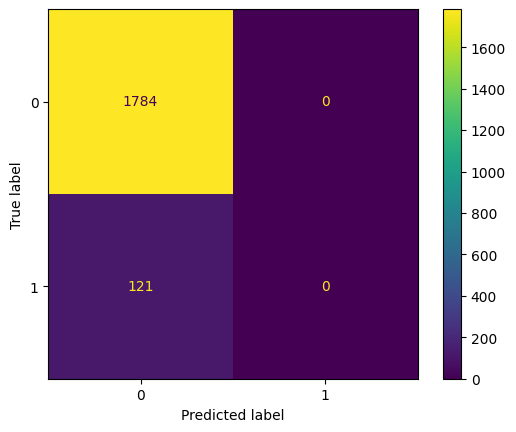

In [11]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdB= En_Offen_span_1spv(**En_Hypm_vsb.best_params_)
En_Offen_span_MdB.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

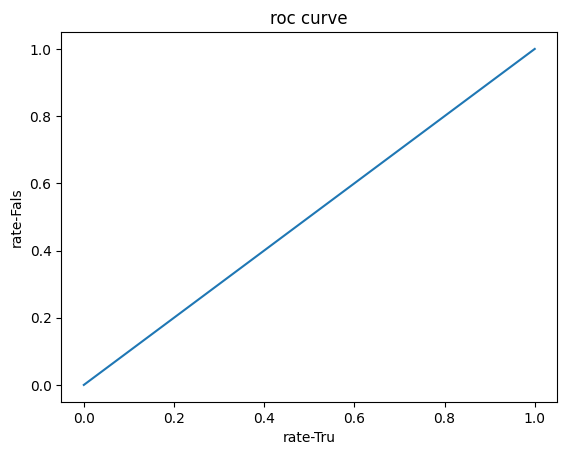

auc- curve: 0.5


In [13]:
from sklearn.metrics import roc_curve as En_Offen_span_rc
from sklearn.metrics import roc_auc_score as En_Offen_span_ac
import matplotlib.pyplot as En_Offen_span_mt

En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1789
         1.0       0.00      0.00      0.00       117

    accuracy                           0.94      1906
   macro avg       0.47      0.50      0.48      1906
weighted avg       0.88      0.94      0.91      1906


 testing duration: 43.21664071083069 



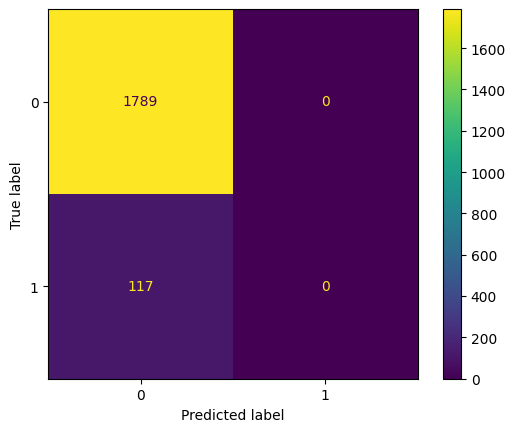

In [14]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

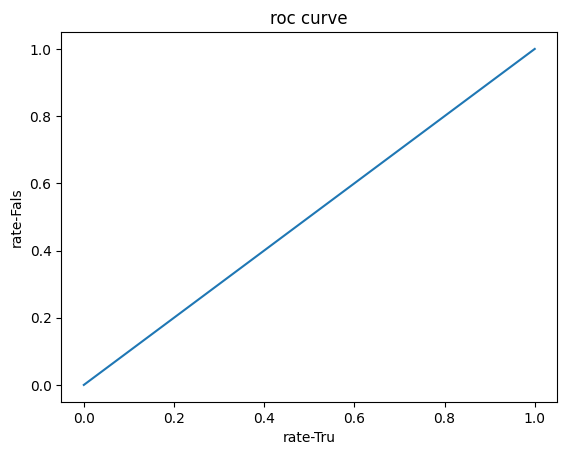

auc- curve: 0.5


In [15]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))